# 1. Noice Search

In [2]:
import numpy as np
def smooth_signum(delta, eps = 0.2):
    return np.where(abs(delta)<=eps, 0, 1*np.sign(delta))

In [3]:
def myscaler(X):
    M = X.max(axis= 0)
    m = X.min(axis= 0)
    M = np.where(M>0, M, 1)
    m = np.where(m < 0, -m, 1)
    X = np.where(X>0, X/M, X/m)
    return X

In [442]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm[keys].values, frust[keys].values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta, eps = 0.2)

In [8]:
# Score Function
def d(x):
    return np.linalg.norm(x, 3)/x.shape[0]
def bcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    c_X = X.mean(axis = 0)
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += d(c_i - c_X)*X_i.shape[0]
    return s/(len(classes)*(X_i.shape[0]))
def wcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += sum([d(i-c_i) for i in X_i])/X_i.shape[0]
    return s
def balance(y):
    classes = [i for i in range(min(y), max(y)+1)]
    sizes = [len([j for j in y if j==i]) for i in classes]
    M = (max(sizes) - min(sizes))/len(y) * len(classes)
    return M
def SF(X,y):
    alpha = 0
    return 1 - 1/np.exp(np.exp(bcd(X,y) - wcd(X,y))) + alpha * np.exp(-balance(y))

In [444]:
res = dict()
gen = range(1, 10)
init = 100
D = 10
delta_ = PCA(D).fit_transform(delta)

In [453]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
res_y  = list()
eps = np.linspace(2.5, 7.5, 1000)
for i in eps:
    y = DBSCAN(eps = i).fit_predict(delta_)
    res_y.append(y)

In [454]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['DBSCAM'] = cur_res

<IPython.core.display.Javascript object>


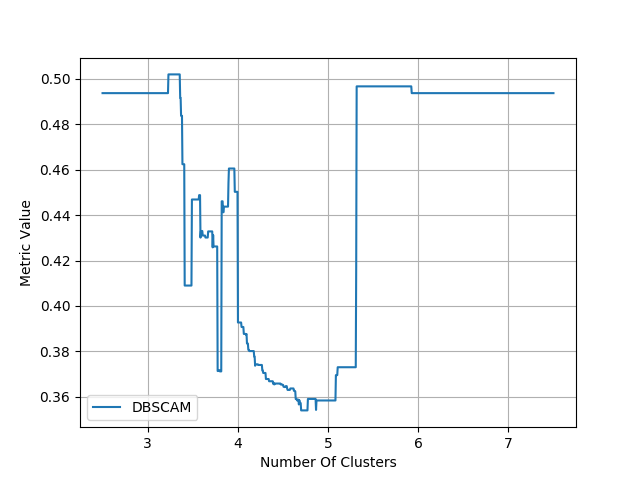

In [455]:
import matplotlib.pylab as plt
%matplotlib notebook
keys = res.keys()
for key in keys:
    plt.plot([i for i in eps], res[key])
plt.grid()
plt.legend(keys, loc='lower left')
plt.xlabel('Number Of Clusters')
plt.ylabel('Metric Value')
plt.savefig('Images/clusters_number.pdf')

# 2. Common Features Distribution

In [4]:
import numpy as np
def smooth_signum(delta, eps = 0.2):
    return np.where(abs(delta)<=eps, 0, 1*np.sign(delta))

In [5]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm[keys].values, frust[keys].values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta, eps = 0.2)
folder_results = 'DeltaMain'

In [6]:
_ = ['число знаков пунктуации / число слов',
     'тональность слов (по округленным значениям)',
     'Число отрицательных приставок и форм (не,ни,бес,без) / Число слов',
     'часть речи: частица',
      'сем. роль: каузатив',
     'словарь: инвективы',
     'сем. роль: ликвидатив',
     'доля местоимений 1 лица',
     'словарь: лексика сопротивления',
     'сем. роль: деструктив']
main_keys = [ind for ind,i in enumerate(keys) if keys[ind].lower() in _ or keys[ind] in _]

In [7]:
def f(delta_, delta, n = 21):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(-1, 1, n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
y = np.ones(delta_.shape[0])
classes = [1]
for y_ in classes:
    delta_1 = scaled_delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, frust-calm))
ind = 0

NameError: name 'delta_' is not defined

0 Число знаков пунктуации / Число слов


<IPython.core.display.Javascript object>


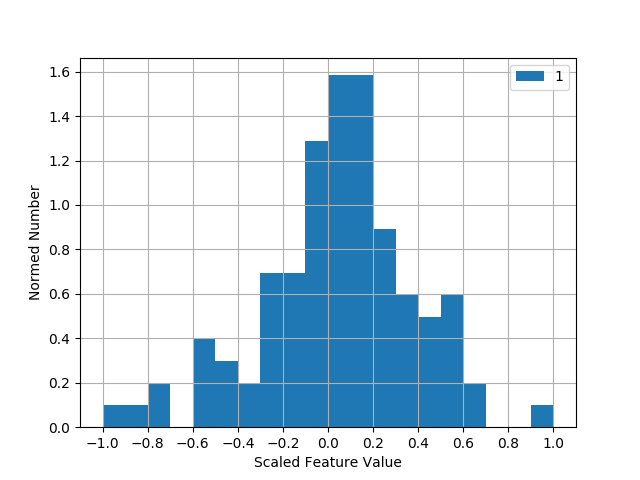

In [464]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

1 Тональность слов (по округленным значениям)


<IPython.core.display.Javascript object>


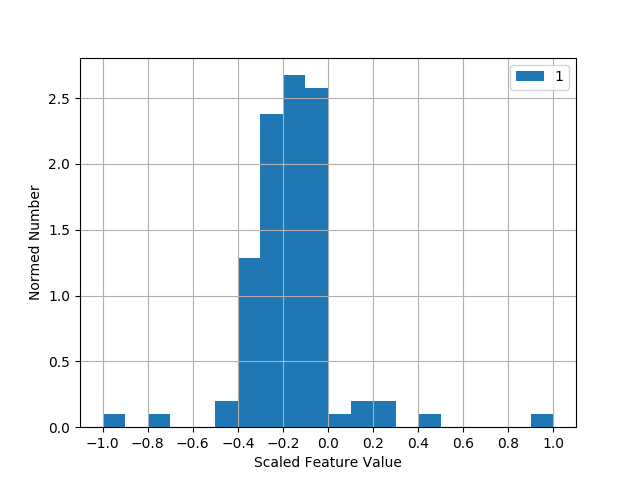

In [465]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

2 Число отрицательных приставок и форм (не,ни,бес,без) / Число слов


<IPython.core.display.Javascript object>


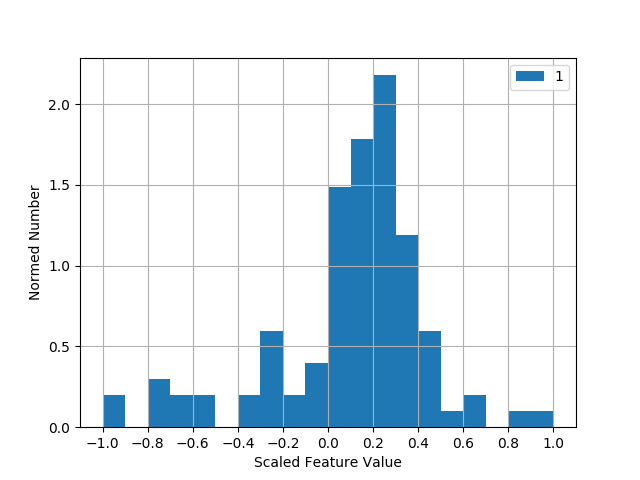

In [466]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

3 Доля местоимений 1 лица


<IPython.core.display.Javascript object>


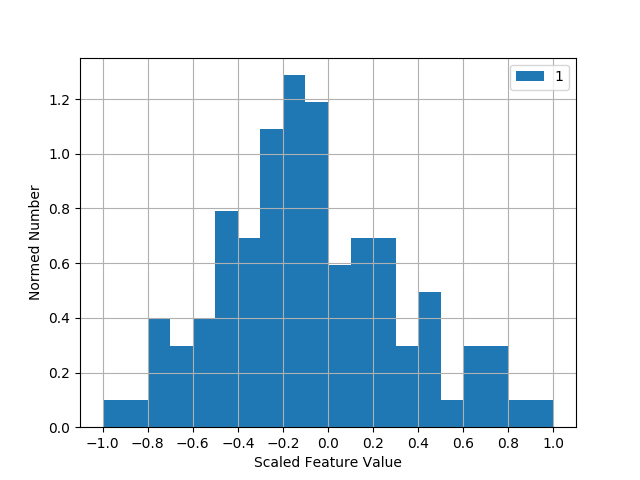

In [467]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

4 Словарь: Инвективы


<IPython.core.display.Javascript object>


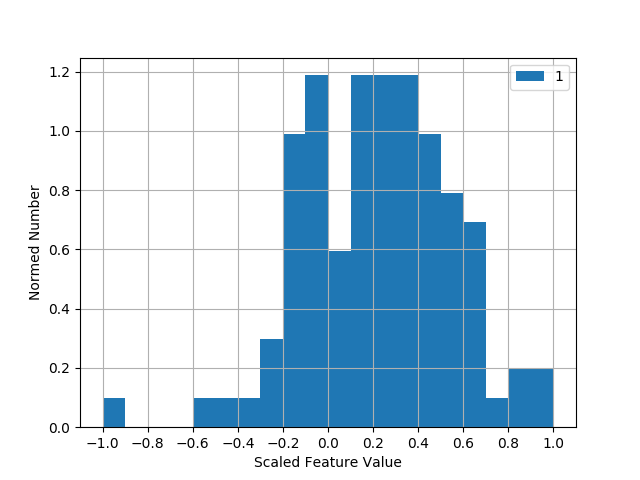

In [468]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

5 Словарь: Лексика сопротивления


<IPython.core.display.Javascript object>


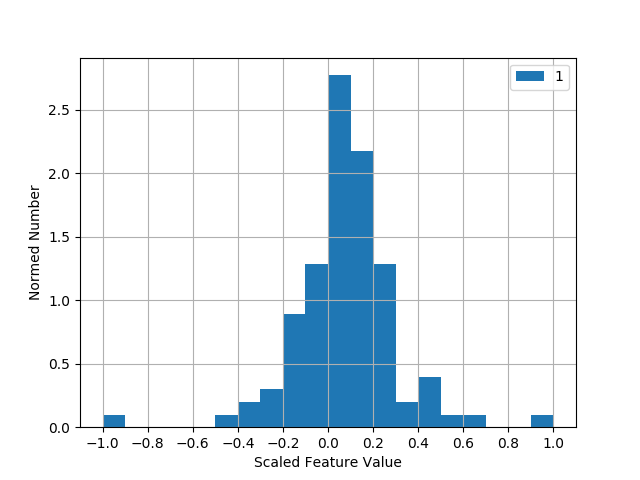

In [469]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

6 Часть речи: частица


<IPython.core.display.Javascript object>


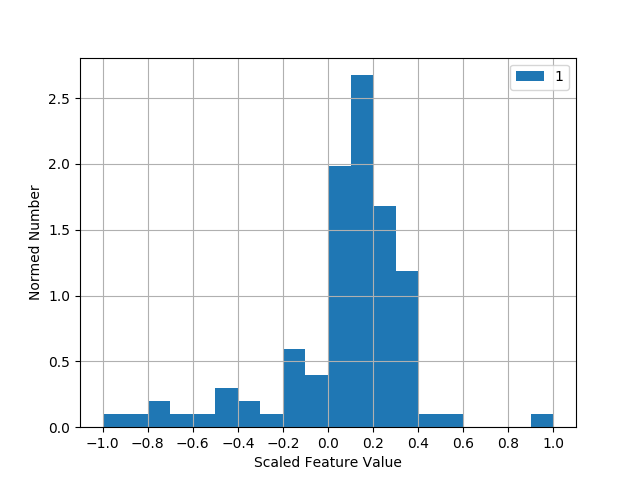

In [470]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

7 Сем. роль: деструктив


<IPython.core.display.Javascript object>


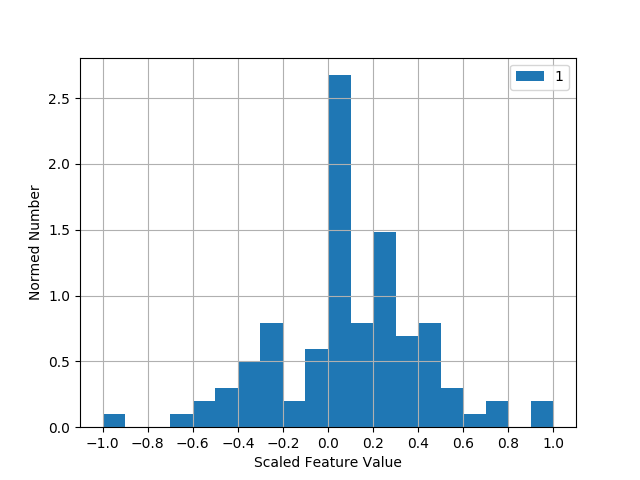

In [471]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

8 Сем. роль: каузатив


<IPython.core.display.Javascript object>


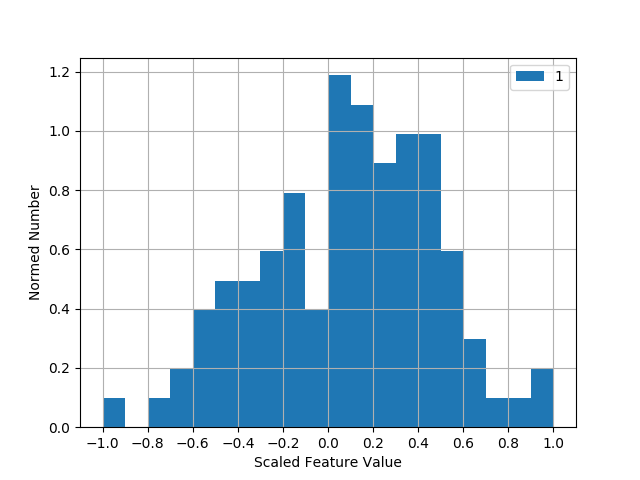

In [472]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

# 3. Clusters Number

In [450]:
import numpy as np
def smooth_signum(delta, eps = 0.05):
    return np.where(abs(delta)<=eps, 0, 1*np.sign(delta))

In [451]:
def myscaler(X):
    M = X.max(axis= 0)
    m = X.min(axis= 0)
    M = np.where(M>0, M, 1)
    m = np.where(m < 0, -m, 1)
    X = np.where(X>0, X/M, X/m)
    return X

In [452]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm[keys].values, frust[keys].values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta)

In [11]:
# Score Function
def d(x):
    return np.linalg.norm(x, 2)/x.shape[0]
def bcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    c_X = X.mean(axis = 0)
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += d(c_i - c_X)*X_i.shape[0]
    return s/(len(classes)*np.sqrt(X_i.shape[0]))
def wcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += sum([d(i-c_i) for i in X_i])/X_i.shape[0]
    return s
def balance(y):
    classes = [i for i in range(min(y), max(y)+1)]
    sizes = [len([j for j in y if j==i]) for i in classes]
    return min(min(sizes) / 10, 1)
def SF(X,y):
    alpha = 0.1
    return (1 - 1/np.exp(np.exp(bcd(X,y) - wcd(X,y)))) * balance(y)

In [455]:
from sklearn.decomposition import PCA
res = dict()
gen = range(1, 6)
init = 100
D = 10
delta_ = PCA(D).fit_transform(delta)

In [456]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
res_y  = list()
for i in gen:
    y = KMeans(n_clusters=i, n_init = init).fit_predict(delta_)
    res_y.append(y)

In [457]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['KMeans'] = cur_res

In [458]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
res_y  = list()
CT = 'tied'
for i in gen:
    y = GaussianMixture(n_components=i, n_init = init, covariance_type = CT).fit_predict(delta_)
    res_y.append(y)

In [459]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['Gauss_'+CT] = cur_res

In [460]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
res_y  = list()
CT = 'diag'
for i in gen:
    y = GaussianMixture(n_components=i, n_init = init, covariance_type = CT).fit_predict(delta_)
    res_y.append(y)

In [461]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['Gauss_'+CT] = cur_res

In [462]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
res_y  = list()
CT = 'spherical'
for i in gen:
    y = GaussianMixture(n_components=i, n_init = init, covariance_type = CT).fit_predict(delta_)
    res_y.append(y)

In [463]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['Gauss_'+CT] = cur_res

In [464]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
res_y  = list()
dist = 'euclidean'
for i in gen:
    y = AgglomerativeClustering(n_clusters=i, affinity = dist).fit_predict(delta_)
    res_y.append(y)

In [465]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['AgglomerativeClustering_' + dist] = cur_res

In [466]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
res_y  = list()
dist = 'l1'
for i in gen:
    y = AgglomerativeClustering(n_clusters=i, affinity = dist, linkage = 'complete').fit_predict(delta_)
    res_y.append(y)

In [467]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['AgglomerativeClustering_' + dist] = cur_res

<IPython.core.display.Javascript object>


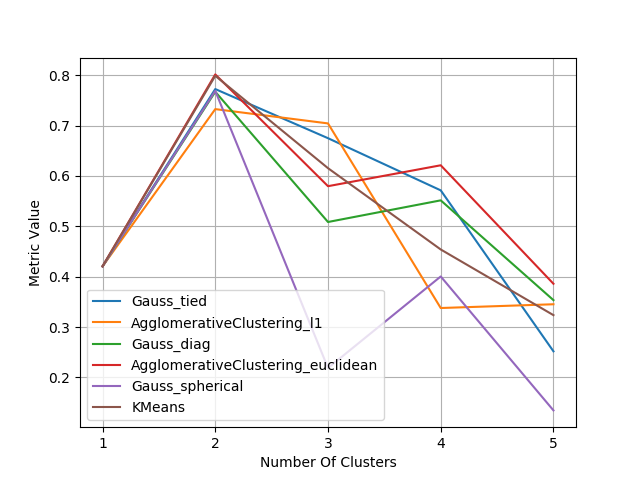

In [468]:
import matplotlib.pylab as plt
%matplotlib notebook
keys = res.keys()
for key in keys:
    plt.plot([i for i in gen], res[key])
plt.grid()
plt.legend(keys, loc='lower left')
plt.xlabel('Number Of Clusters')
plt.ylabel('Metric Value')
plt.xticks([i for i in gen])
plt.savefig('Images/clusters_number.pdf')

# 3. Many Clusters

In [12]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm.values, frust.values
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta)

In [13]:
folder_results = "ManyClusters/"

## Clustering

0.8035884505370234
0 66
1 35


<IPython.core.display.Javascript object>


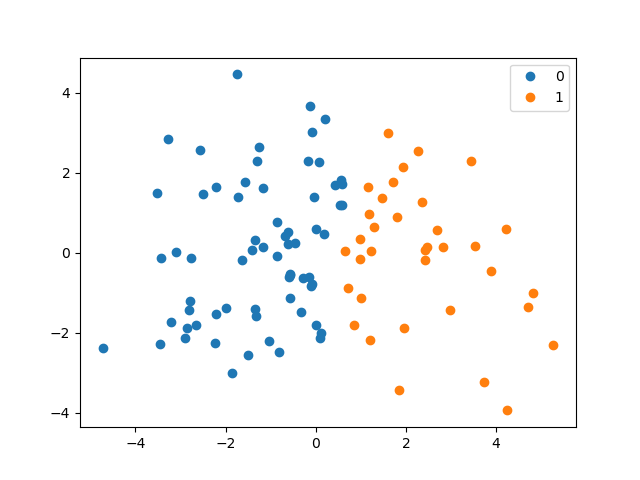

In [72]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

delta_ = PCA(10).fit_transform(delta)
y = KMeans(n_clusters=2, n_init = 10000).fit_predict(PCA(10).fit_transform(delta))
print(SF(delta_, y))
import matplotlib.pylab as plt
%matplotlib notebook
delta_ = PCA(2).fit_transform(delta)
classes = [i for i in range(min(y), max(y)+1)]
D = list()
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    print(y_, len(delta_1))
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(scaled_delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]].mean(axis = 0))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)
plt.savefig('Images/' + folder_results +'Cluster.pdf')

## The Most Different Features

<IPython.core.display.Javascript object>


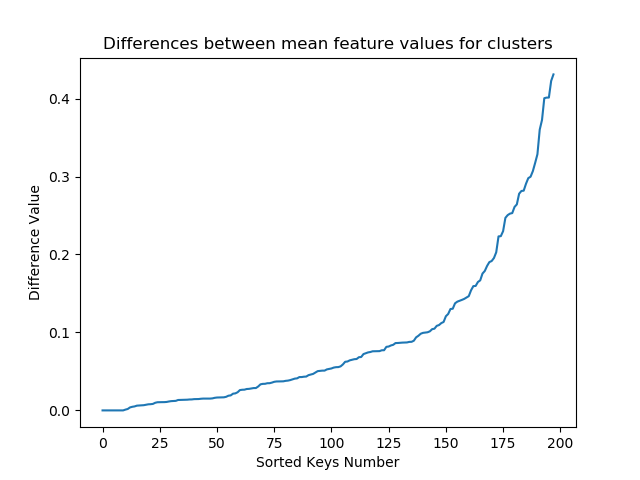

Text(0, 0.5, 'Difference Value')

In [73]:
def get_max(D):
    res = list()
    for i in D:
        for j in D:
            res.append(np.absolute(i-j))
    res = np.array(res)
    return res.max(axis = 0)
cluster_delta = get_max(D)
cluster_delta = [(i, ind) for ind, i in enumerate(cluster_delta)]
cluster_delta.sort(key = lambda x: x[0])
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot([i for i in range(len(keys))], [i[0] for i in cluster_delta])
plt.title('Differences between mean feature values for clusters')
plt.xlabel('Sorted Keys Number')
plt.ylabel('Difference Value')

In [74]:
m = 0.6*max([i[0] for i in cluster_delta])
main_keys = [i for i in cluster_delta if i[0] > m]
ind = 0
print('Number of Main Keys',len(main_keys))
for ind in main_keys:
    print(keys[ind[1]], D[0][ind[1]], D[1][ind[1]])
main_keys = [i[1] for i in main_keys]

Number of Main Keys 18
Доля местоимений 1 лица -0.16139351582751074 0.09962167627277795
Часть речи: местоименное наречие 0.018939157602670537 0.2832080368760799
Причастия + деепричастия / Число предложений 0.0934775944023909 -0.1844750496184274
Сем. связь: DLB -0.028613458896981258 0.2528756349631285
Число отрицательных приставок и форм (не,ни,бес,без) / Число слов 0.007429663007739434 0.2893182806129669
Часть речи: частица -0.024389753060725848 0.26633232050131744
Сем. роль: делибератив -0.14920780761223107 0.14872592384489436
Часть речи: прилагательное 0.027128784937944683 -0.2726482573118263
Коэффициент Трейгера 0.0319995410093389 0.33896279381573774
Число знаков пунктуации / Число слов -0.06664219386621312 0.25083419312776767
Сем. роль: предикат -0.011860605914421462 -0.34049290868362575
Доля местоимений 1 лица ед. числа -0.18963608601893478 0.17051815713517196
Коэффициент опредмеченности действия (кол. глаголов / кол. существительных) 0.003044129178055653 0.37563098804504924
Средн

In [77]:
def f(delta_, delta, n = 11):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(-1, 1, n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
for y_ in classes:
    delta_1 = scaled_delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, frust-calm))
ind = len(main_keys)-1

0 Доля глаголов прошедшего времени, первого лица, единственного числа


<IPython.core.display.Javascript object>


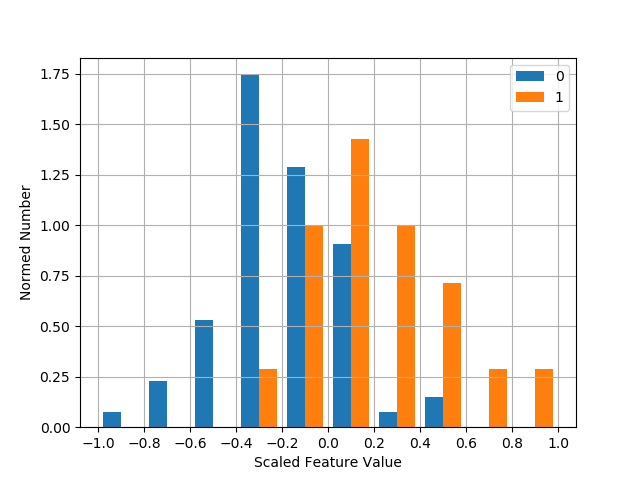

In [78]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

1 Доля глаголов 1 лица


<IPython.core.display.Javascript object>


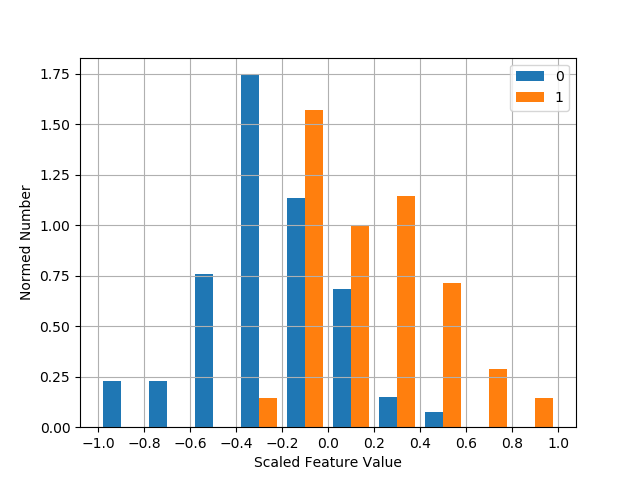

In [79]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

2 Часть речи: существительное


<IPython.core.display.Javascript object>


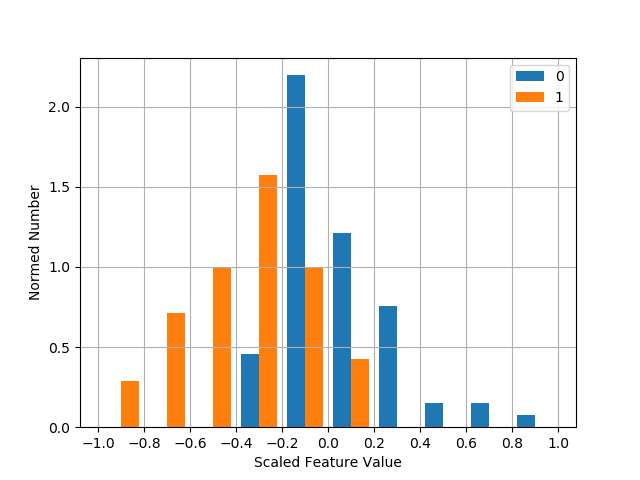

In [80]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

3 Часть речи: местоимение-существительное


<IPython.core.display.Javascript object>


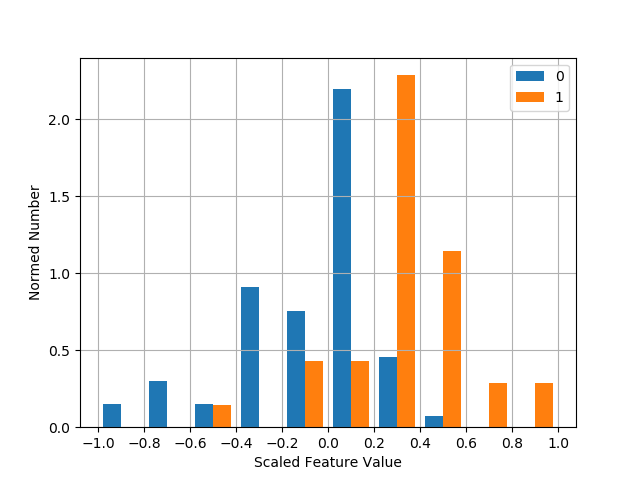

In [81]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

4 Средняя длина слов (в количестве символов)


<IPython.core.display.Javascript object>


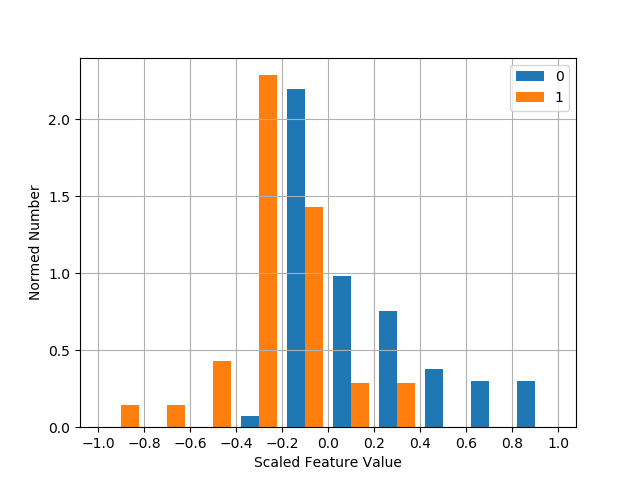

In [82]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

5 Коэффициент опредмеченности действия (кол. глаголов / кол. существительных)


<IPython.core.display.Javascript object>


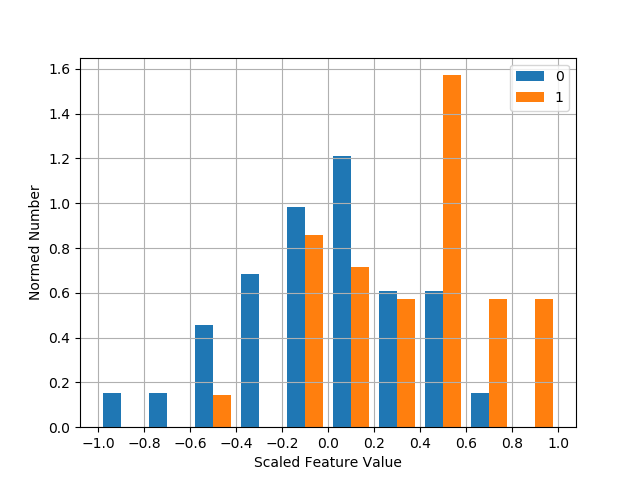

In [83]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

6 Доля местоимений 1 лица ед. числа


<IPython.core.display.Javascript object>


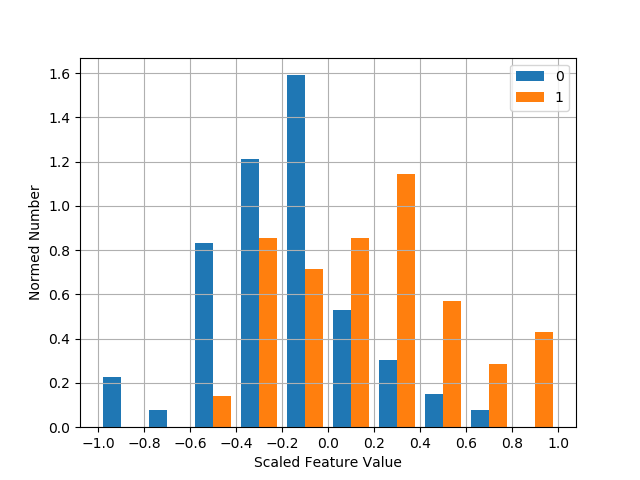

In [84]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

7 Сем. роль: предикат


<IPython.core.display.Javascript object>


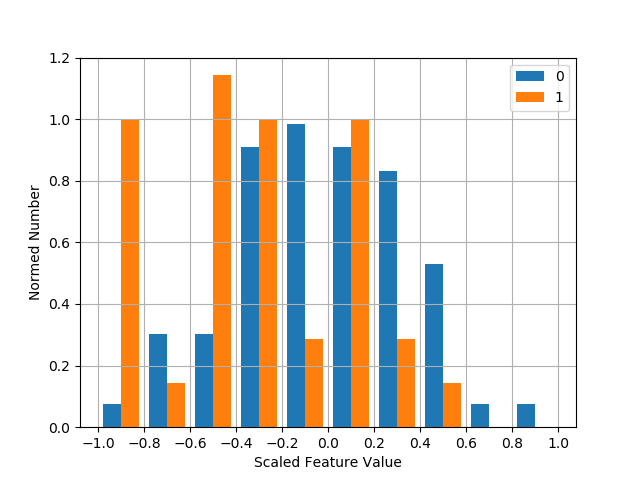

In [85]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

8 Число знаков пунктуации / Число слов


<IPython.core.display.Javascript object>


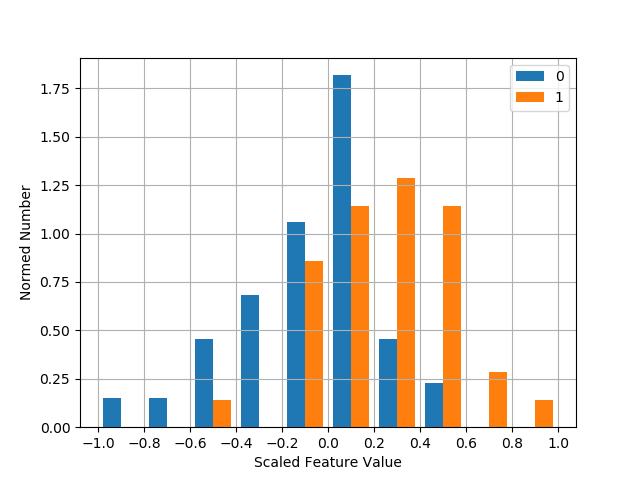

In [86]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

9 Коэффициент Трейгера


<IPython.core.display.Javascript object>


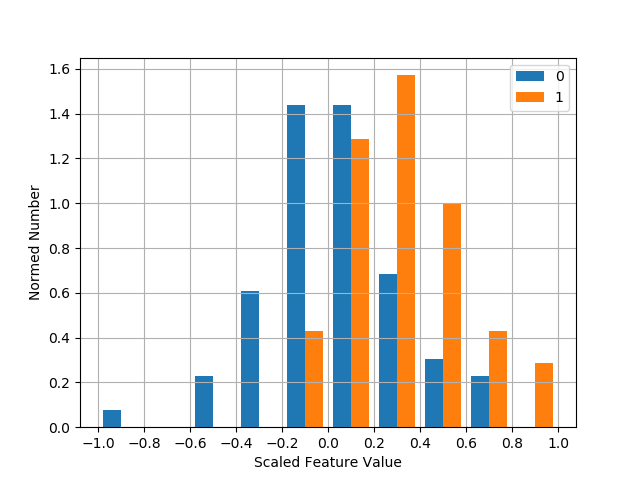

In [87]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

10 Часть речи: прилагательное


<IPython.core.display.Javascript object>


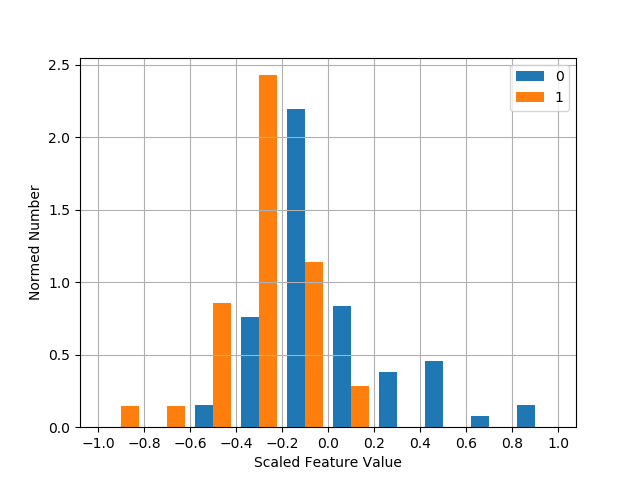

In [88]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

11 Сем. роль: делибератив


<IPython.core.display.Javascript object>


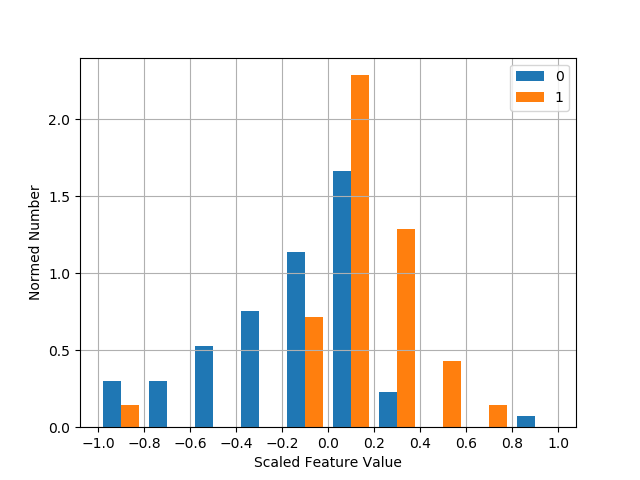

In [89]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

12 Часть речи: частица


<IPython.core.display.Javascript object>


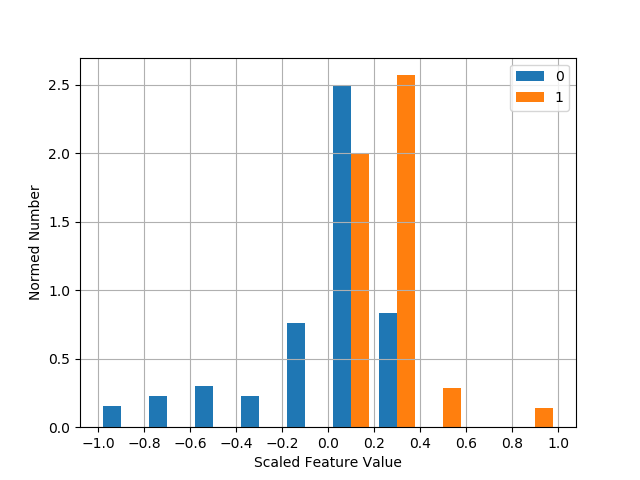

In [90]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

13 Число отрицательных приставок и форм (не,ни,бес,без) / Число слов


<IPython.core.display.Javascript object>


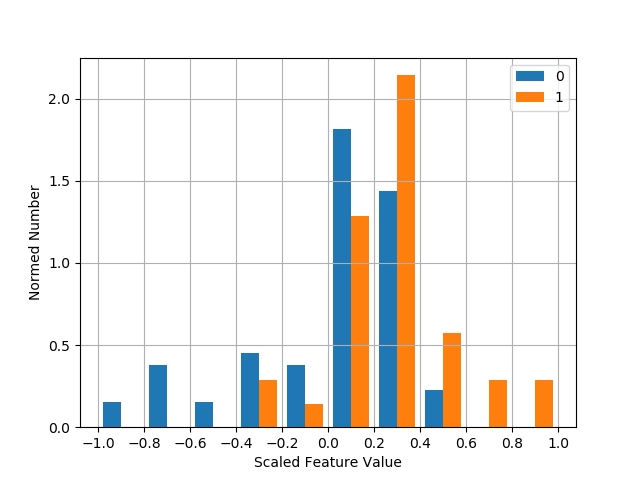

In [91]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

14 Сем. связь: DLB


<IPython.core.display.Javascript object>


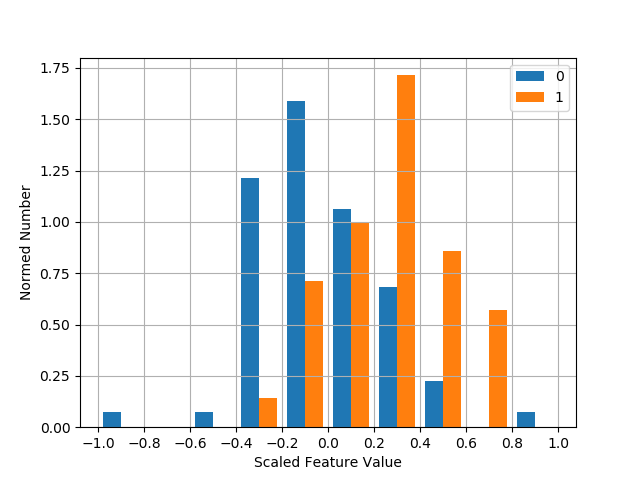

In [92]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

15 Причастия + деепричастия / Число предложений


<IPython.core.display.Javascript object>


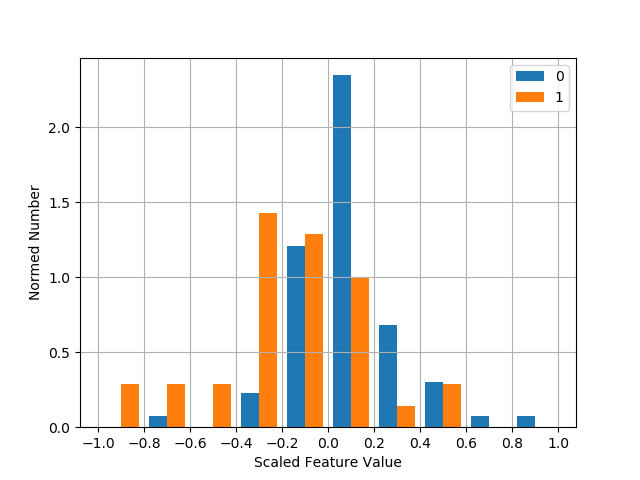

In [93]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

16 Часть речи: местоименное наречие


<IPython.core.display.Javascript object>


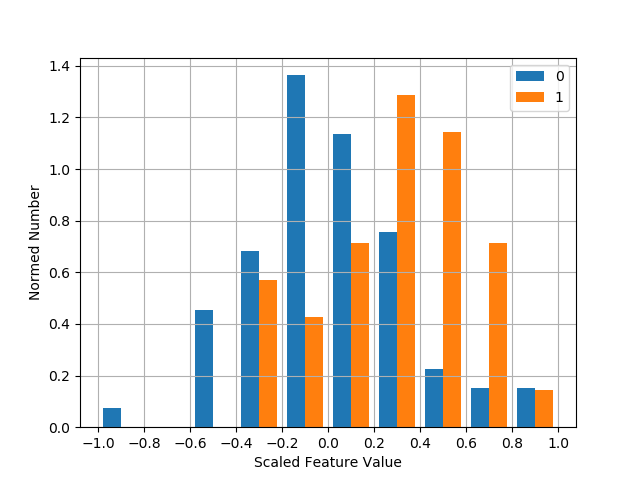

In [94]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

17 Доля местоимений 1 лица


<IPython.core.display.Javascript object>


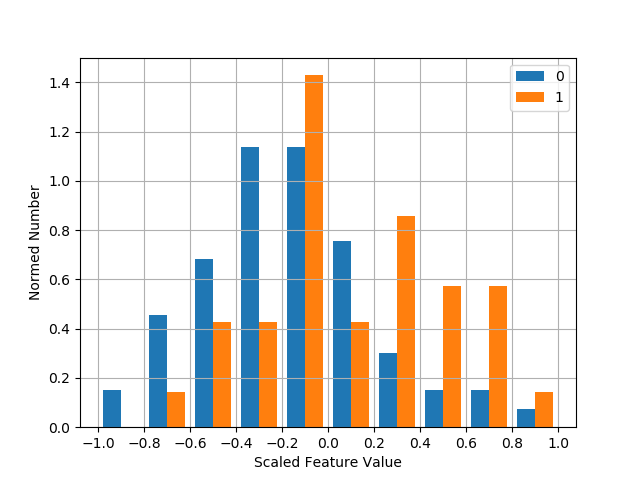

In [95]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1